<a href="https://colab.research.google.com/github/sanjana241/Pixel-attacks-/blob/main/371H_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NameError: ignored

In [ ]:


# Python Libraries

import pickle
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import cifar10
from keras import backend as K

# Custom Networks
from networks.lenet import LeNet

from networks.resnet import ResNet


# Helper functions

import helper
import random 


matplotlib.style.use('ggplot')
np.random.seed(100)

Cloning into 'one-pixel-attack-keras'...
remote: Enumerating objects: 346, done.
remote: Total 346 (delta 0), reused 0 (delta 0), pack-reused 346
Receiving objects: 100% (346/346), 44.43 MiB | 30.51 MiB/s, done.
Resolving deltas: 100% (201/201), done.
renamed 'one-pixel-attack-keras/1_one-pixel-attack-cifar10.ipynb' -> './1_one-pixel-attack-cifar10.ipynb'
renamed 'one-pixel-attack-keras/2_one-pixel-attack-imagenet.ipynb' -> './2_one-pixel-attack-imagenet.ipynb'
renamed 'one-pixel-attack-keras/attack.py' -> './attack.py'
renamed 'one-pixel-attack-keras/CONTRIBUTING.md' -> './CONTRIBUTING.md'
renamed 'one-pixel-attack-keras/data' -> './data'
renamed 'one-pixel-attack-keras/differential_evolution.py' -> './differential_evolution.py'
renamed 'one-pixel-attack-keras/helper.py' -> './helper.py'
renamed 'one-pixel-attack-keras/images' -> './images'
renamed 'one-pixel-attack-keras/LICENSE' -> './LICENSE'
renamed 'one-pixel-attack-keras/networks' -> './networks'
renamed 'one-pixel-attack-keras/

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
lenet = LeNet()
resnet = ResNet()

models = [lenet, resnet]



Successfully loaded lenet
Successfully loaded resnet


In [ ]:
def predict_classes1(img, target_class, model, minimize=True):
    predictions = model.predict(img)[:,target_class]
    return predictions if minimize else 1 - predictions

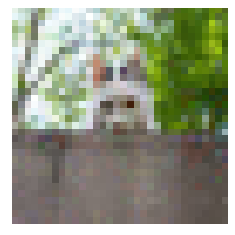

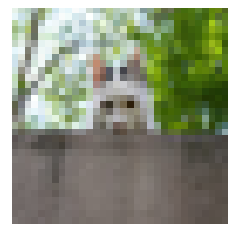

Confidence in true class cat is 3.9208246e-09
Prior confidence was 0.9953849
The percentage difference is 99.53848719596863


In [ ]:
def attack1(img):    
    model = resnet
    image_id = img # Image index in the test set
    true_class = y_test[image_id, 0]

    prior_confidence = model.predict_one(x_test[image_id])[true_class]
    prior1 = prior_confidence; prior2 = prior1; prior = prior2
    im = np.copy(x_test[image_id]) 


    array1 = np.full((32,32,3), None)
    array2 = np.full((32,32,3), None)
    array3 = np.full((32,32,3), None)
    for i in range(32): 
        for j in range(32): 
            for k in range(3):
                if im[i][j][k] <= 85:
                    array1[i][j][k] = im[i][j][k]
                if im[i][j][k] > 85 and im[i][j][k] <= 170:
                    array2[i][j][k] = im[i][j][k]
                if im[i][j][k] > 170 and im[i][j][k] <= 255:
                    array3[i][j][k] = im[i][j][k]

    count = 0
    count1 = 0
    count2 = 0
    for i in range(32):
        for j in range(32):
          if None not in array3[i][j]:
              for k in range(3):
                 if im[i][j][k] < 230:
                    count2 = count2 + 1
                    if(count2 > 3):
                       im[i][j][k] = im[i][j][k] + 10
                       confidence = model.predict_one(im)[true_class]
                       if(confidence >= prior):
                           im[i][j][k] = im[i][j][k] - 10
                       else:
                         prior = confidence

     
          if None not in array2[i][j]:
              for k in range(3):
                    count1 = count1 + 1
                    if(count1 > 3):
                      im[i][j][k] = im[i][j][k] + 10
                      #if random.randint(0,50) == 43:
                            #im[i][j] = [255, 255, 255]
                      confidence = model.predict_one(im)[true_class]
                      if(confidence >= prior2):
                            im[i][j][k] = im[i][j][k] - 10
                      else:
                         prior2 = confidence



          if None not in array1[i][j]:
              for k in range(3):
                    count = count + 1
                    if(count > 3):
                      im[i][j][k] = im[i][j][k] + 20
                      #if random.randint(0,50) == 43:
                            #im[i][j] = [255, 255, 255]
                      confidence = model.predict_one(im)[true_class]
                      if(confidence >= prior1):
                            im[i][j][k] = im[i][j][k] - 20
                      else:
                          prior1 = confidence


                    
    
    confidence = model.predict_one(im)[true_class]
    helper.plot_image(im)
    helper.plot_image(x_test[image_id])
    print('Confidence in true class', class_names[true_class], 'is', confidence)
    print('Prior confidence was', prior_confidence)  
    delta = (prior_confidence - confidence)*100 
    print('The percentage difference is', delta)
attack1(1346)

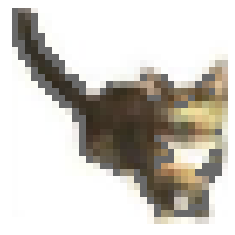

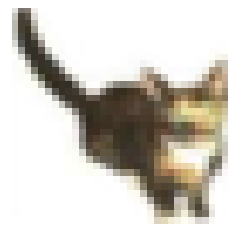

Confidence in true class cat is 0.012255394
Prior confidence was 0.9215644
The percentage difference is 90.93090295791626


In [ ]:
def attack2(img):    
    model = resnet
    image_id = img # Image index in the test set
    true_class = y_test[image_id, 0]
    prior_confidence = model.predict_one(x_test[image_id])[true_class]
    prior1 = prior_confidence; prior2 = prior1; prior = prior2
    im1 = np.copy(x_test[image_id]) 
    im2 = np.copy(x_test[image_id]) 
    avg_arr = np.full((32,32,3), None)


    for i in range(32): 
        for j in range(32):
            avg = int(sum(im1[i][j])/3)
            avg_arr[i][j] = avg 
    for i in range(31): 
        for j in range(31): 
           if ((abs(avg_arr[i][j] - avg_arr[i][j-1]) >= 30).all() and (abs(avg_arr[i][j] - avg_arr[i][j+1]) >= 30).all()):
             im1[i][j] = [105,105,105]
    helper.plot_image(im1)
    helper.plot_image(im2)


    confidence = model.predict_one(im1)[true_class]
    print('Confidence in true class', class_names[true_class], 'is', confidence)
    print('Prior confidence was', prior_confidence) 
    delta = (prior_confidence - confidence)*100 
    print('The percentage difference is', delta)

attack2(790)

Confidence in true class bird is 0.4153281
Prior confidence was 0.99978906
The percentage difference is 58.4460973739624
okay


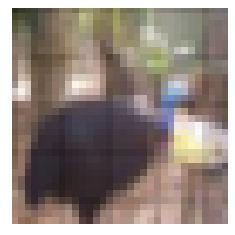

In [ ]:
def attack3(img_id, partition, random):
    image_id = img_id
    img = np.copy(x_test[image_id])
    true_class = y_test[image_id, 0]
    model = resnet
    prior_confidence = model.predict_one(x_test[image_id])[true_class]

    
    #partiton => every _____ rows/columns
    for i in range(32): 
      if (random == False):
         if i%partition==0: # for set number of partitions
            for j in range(32): 
                img[i][j] =  img[i][j] * 0.90
                img[j][i] =  img[j][i] * 0.90
      if(random == True):
            i = random.randint(0,31) # for random
            for j in range(32): 
                img[i][j] =  img[i][j] * 0.90
                img[j][i] =  img[j][i] * 0.90

    confidence = predict_classes1(img, true_class, model)[0]

    print('Confidence in true class', class_names[true_class], 'is', confidence)
    print('Prior confidence was', prior_confidence)
    delta = (prior_confidence - confidence)*100
    print('The percentage difference is', delta)
    if confidence < prior_confidence: 
        print("okay")
    else: 
        print("fail")
    helper.plot_image(img)
attack3(430, 7, False)

Confidence in true class bird is 0.17942064
Prior confidence was 0.99978906
The percentage difference is 82.03684091567993
okay


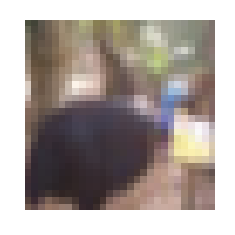

In [ ]:
def attack4(img_id, pixels):
    a = pixels # however many pixels you wanna block
    image_id = img_id
    img = np.copy(x_test[image_id])
    for i in range(32): 
        for j in range(a): 
            img[i][j] =  255
            img[j][i] =  255
            img[i][(32-a)+j] = 255
            img[j+(32-a)][i] =  255
    model = resnet

    true_class = y_test[image_id, 0]
    prior_confidence = model.predict_one(x_test[image_id])[true_class]
    confidence = predict_classes1(img, true_class, model)[0]

    print('Confidence in true class', class_names[true_class], 'is', confidence)
    print('Prior confidence was', prior_confidence)
    delta = (prior_confidence - confidence)*100
    print('The percentage difference is', delta)
    if confidence < prior_confidence: 
        print("okay")
    else: 
        print("fail")
    helper.plot_image(img)
    
attack4(430,2)

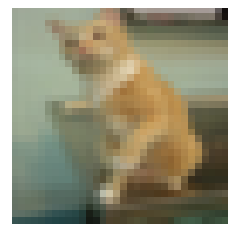

0.9999995


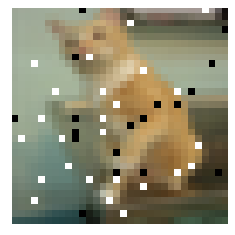

0.912408


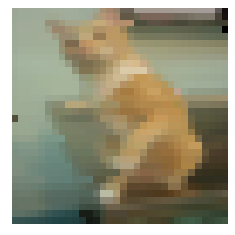

0.99999964


In [ ]:
def defense(img):    
    import random 
    model = resnet
    sor =[]
    image_id = img # Image index in the test set
    true_class = y_test[image_id, 0]
    prob = 0.03
    thres = 1- prob
    prior_confidence = model.predict_one(x_test[image_id])[true_class]
    prior1 = prior_confidence; prior2 = prior1; prior = prior2
    im3 = np.copy(x_test[image_id]) 
    im4 = np.copy(x_test[image_id]) 
    ### Adding Noise ###
    for i in range(32): 
        for j in range(32):                 
                if random.random() < prob:
                    im4[i][j]= [0,0,0]
                elif random.random() > thres:
                    im4[i][j]= [255,255,255]
    im6 = np.copy(im4) 
    
    ### Removing Noise ###
    
    for i in range(31): 
        for j in range(31): 
            for k in range(3):
                sor.append(im6[i][j][k])
                sor.append(im6[i][j+1][k])
                sor.append(im6[i][j-1][k])
                sor.sort()
                im6[i][j][k] = sor[1]
                sor=[]
    confidence1 = model.predict_one(im3)[true_class]
    confidence2 = model.predict_one(im4)[true_class]
    confidence3 = model.predict_one(im6)[true_class]
    helper.plot_image(im3)
    print(confidence1)
    helper.plot_image(im4)
    print(confidence2)
    helper.plot_image(im6)
    print(confidence3)



defense(4400)